# Explicit Example

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Example we solved in class:

\begin{align*}
 \frac{dy}{dx} &= x^2\\
 y(3) &= 5\\
 \rightarrow y &= \frac 13x^3-4
\end{align*}

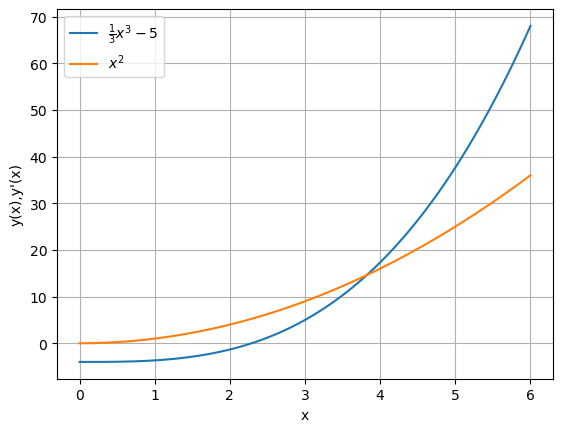

In [2]:
# f'. In general a function of x and y, but this one is only a function of x
def f(x,y):
    return x**2

# Explicit solution that we found in class
def y(x):
    return x**3/3. - 4   


# Plot both
x = np.linspace(0.,6.,100)
plt.plot(x,y(x),label = r'$\frac{1}{3}x^3-5$')
plt.plot(x,f(x,0),label = r'$x^2$')
plt.legend()
plt.xlabel('x')
plt.ylabel('y(x),y\'(x)')
plt.grid()
plt.show()

The function below will start with 
$$
    y_0=y(a) = c
$$
then extrapolate forward backward using
$$
     y_{i} = y_{i-1} + f(x_{i-1},y_{i-1})\times dx
$$
where
$$
        dx \approx \pm h
$$
where the sign is the sign of $(b-a)$ and the value accounts for possible roundoff errors.

In [3]:
# Do an euler extrapolation
# Arguments
# f = f(x,y): function returning the derivative as a function of x and y
# a: initial point in x
# b: final point in x (can be <a)
# c: y(a)
# h: step size in x
def euler(f,a,b,c,h):
    n =  int(abs(b-a)/h)    # number of points
    x = np.linspace(a,b,n)  # Array of xvalues
    # calculate delta x, accounting for roundoff errors and sign
    dx = x[1]-x[0]
    # output array
    y = np.empty(n)
    # Set to initial value
    y[0] = c
    # Extrapolate forward or backward, depending on dx
    for i in range(n-1):
        y[i+1] = y[i]+f(x[i],y[i])*dx
    return x,y

In [10]:
# extrapolate forward
h = .1
xfe,yfe = euler(f,3.,6.,5.,h)
# extrapolate backward
xbe,ybe = euler(f,3.,0.,5.,h)

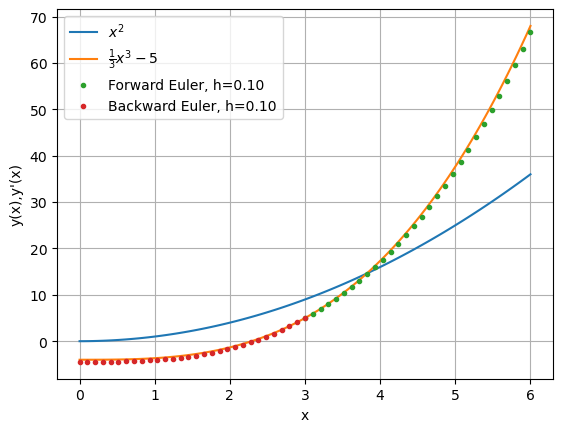

In [11]:
# Plot everything
x = np.linspace(0.,6.,100)
plt.plot(x,f(x,0.),label = r'$x^2$')
plt.plot(x,y(x),label = r'$\frac{1}{3}x^3-5$')
plt.plot(xfe,yfe,'.', label = f'Forward Euler, h={h:.2f}')
plt.plot(xbe,ybe,'.', label = f'Backward Euler, h={h:.2f}')
plt.legend()
plt.xlabel('x')
plt.ylabel('y(x),y\'(x)')
plt.grid()
plt.show()